In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, f1_score

### Data importing

##### TF-IDF

In [63]:
from scipy.sparse import load_npz
X_unfiltered = load_npz("30k_regression_dataset.npz")
X_unfiltered.shape


(30000, 57157)

In [83]:
import numpy as np

y_unfiltered = np.load("30k_regression_labels.npy")
y_unfiltered.shape

(30000,)

##### Delete years with less than 10 instances

[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023] [25135  3433   728   263   153    79    45    30    22    30    21    15
    15     9     8    13     1]
Picked years [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


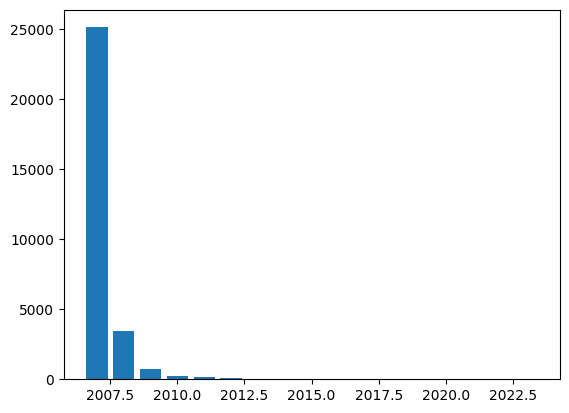

In [84]:
unique_labels, label_counts = np.unique(y_unfiltered, return_counts=True)
plt.bar(unique_labels, label_counts)
print(unique_labels, label_counts)
picked_years = label_counts >= 20
picked_years = unique_labels[picked_years]
print("Picked years", picked_years)

In [87]:
mask = np.array([x in picked_years for x in y_unfiltered]) 
X = X_unfiltered[mask]
y = y_unfiltered[mask]

### Sparse data regression

In [88]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Ridge regression model
ridge_model = KNeighborsRegressor()

# Train the Ridge regression model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)
print("Predictions:", y_pred, "Correct:", y_test)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Predictions: [2007.  2007.4 2007.  ... 2007.  2007.6 2007.6] Correct: [2007 2007 2007 ... 2007 2007 2007]
Mean Squared Error: 0.7212291249164993


<BarContainer object of 6 artists>

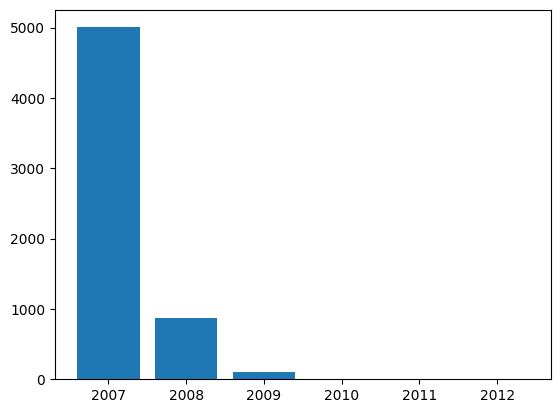

In [89]:
a,b = np.unique(np.round(y_pred), return_counts=True)
plt.bar(a,b)


In [90]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report

print(classification_report(y_test, np.round(y_pred), zero_division=0))

              precision    recall  f1-score   support

        2007       0.86      0.85      0.85      5027
        2008       0.15      0.19      0.17       687
        2009       0.07      0.05      0.06       146
        2010       0.17      0.02      0.03        53
        2011       0.00      0.00      0.00        30
        2012       0.00      0.00      0.00        16
        2013       0.00      0.00      0.00         9
        2014       0.00      0.00      0.00         6
        2015       0.00      0.00      0.00         4
        2016       0.00      0.00      0.00         6
        2017       0.00      0.00      0.00         4

    accuracy                           0.74      5988
   macro avg       0.11      0.10      0.10      5988
weighted avg       0.74      0.74      0.74      5988



In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Ridge regression model
ridge_model = DecisionTreeClassifier()

# Train the Ridge regression model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)
print("Predictions:", y_pred, "Correct:", y_test)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Predictions: [2007 2007 2007 ... 2007 2008 2007] Correct: [2007 2007 2007 ... 2007 2007 2007]
Mean Squared Error: 1.188376753507014


<BarContainer object of 11 artists>

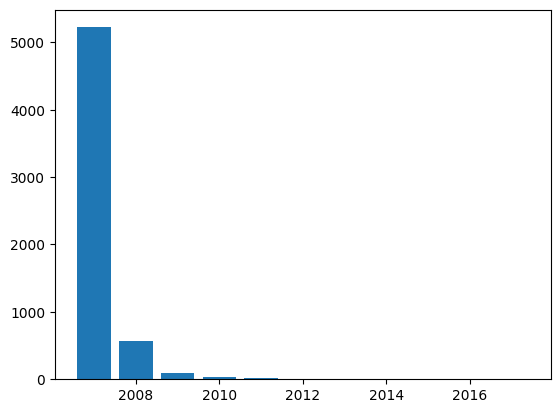

In [95]:
a,b = np.unique(np.round(y_pred), return_counts=True)
plt.bar(a,b)


In [96]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report

print(classification_report(y_test, np.round(y_pred), zero_division=0))

              precision    recall  f1-score   support

        2007       0.85      0.88      0.86      5027
        2008       0.14      0.11      0.13       687
        2009       0.05      0.03      0.04       146
        2010       0.11      0.08      0.09        53
        2011       0.00      0.00      0.00        30
        2012       0.00      0.00      0.00        16
        2013       0.00      0.00      0.00         9
        2014       0.00      0.00      0.00         6
        2015       0.00      0.00      0.00         4
        2016       0.00      0.00      0.00         6
        2017       0.00      0.00      0.00         4

    accuracy                           0.75      5988
   macro avg       0.10      0.10      0.10      5988
weighted avg       0.73      0.75      0.74      5988



### Sparse data classification

In [97]:
from sklearn.neighbors import KNeighborsClassifier

ridge_model = KNeighborsClassifier(n_neighbors=1)

# Train the Ridge regression model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)
print("Predictions:", y_pred, "Correct:", y_test)

Predictions: [2007 2007 2007 ... 2007 2010 2008] Correct: [2007 2007 2007 ... 2007 2007 2007]


In [98]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report

print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

        2007       0.86      0.85      0.85      5027
        2008       0.19      0.20      0.19       687
        2009       0.09      0.09      0.09       146
        2010       0.02      0.02      0.02        53
        2011       0.04      0.03      0.03        30
        2012       0.11      0.12      0.11        16
        2013       0.12      0.11      0.12         9
        2014       0.00      0.00      0.00         6
        2015       0.33      0.25      0.29         4
        2016       0.17      0.17      0.17         6
        2017       0.00      0.00      0.00         4

    accuracy                           0.74      5988
   macro avg       0.17      0.17      0.17      5988
weighted avg       0.74      0.74      0.74      5988



[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017] [20108  2746   582   210   123    63    36    24    18    24    17]


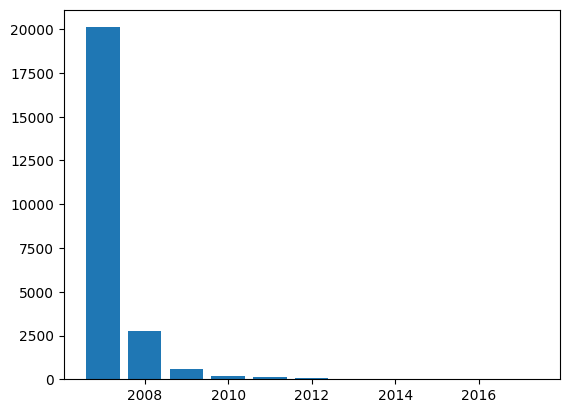

In [99]:
unique_labels, label_counts = np.unique(y_train, return_counts=True)
plt.bar(unique_labels, label_counts)
print(unique_labels, label_counts)

### Word2Vect using GloVe

### Dense data regression